### 数据及介绍
##### MovieLens是推荐系统常用的数据集
##### MovieLens数据集中，用户对自己看过的电影进行评分，分值为1-5.
##### MovieLens包括两个大小不同的库。适用于不同规模的算法，
     小规模是943个用户对1682部电影做约10000次评分的数据
     大规模的是6040个用户对3900部电影做大约100万次评分
    

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
import numpy as np
import pandas as pd
header = ["user_id","item_id","rating","timesamp"]
src_data = pd.read_csv("./ml-100k/u.data",sep='\t',names=header)
src_data.head()

,user_id,item_id,rating,timesamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


### 数据探索

In [3]:
src_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
user_id     100000 non-null int64
item_id     100000 non-null int64
rating      100000 non-null int64
timesamp    100000 non-null int64
dtypes: int64(4)
memory usage: 3.1 MB


In [4]:
#查看总体的数据情况
src_data.describe()

,user_id,item_id,rating,timesamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [5]:
#查看用户去重后的个数
src_data.user_id.nunique()

943

In [6]:
#查看物品去重后的个数
src_data.item_id.nunique()

1682

In [7]:
#检查事都有重复用户物品打分记录
src_data.duplicated(subset=["user_id","item_id"]).sum()

0

### 2、查看一下每个物品对应的用户数量

In [8]:
#每一个电影对应的客户数
item_id_usercnt = src_data.groupby("item_id").count()["user_id"]
item_id_usercnt

item_id
1       452
2       131
3        90
4       209
5        86
6        26
7       392
8       219
9       299
10       89
11      236
12      267
13      184
14      183
15      293
16       39
17       92
18       10
19       69
20       72
21       84
22      297
23      182
24      174
25      293
26       73
27       57
28      276
29      114
30       37
       ... 
1653      1
1654      1
1655      1
1656      2
1657      1
1658      3
1659      1
1660      1
1661      1
1662      2
1663      1
1664      4
1665      1
1666      1
1667      1
1668      1
1669      1
1670      1
1671      1
1672      2
1673      1
1674      1
1675      1
1676      1
1677      1
1678      1
1679      1
1680      1
1681      1
1682      1
Name: user_id, Length: 1682, dtype: int64

Text(0.5,1,'每个物品对应的用户数量')

Text(0.5,0,'评价的客户数/人')

Text(0,0.5,'被评论的电影数')

(array([1.146e+03, 2.490e+02, 1.390e+02, 6.700e+01, 3.800e+01, 2.400e+01,
        7.000e+00, 5.000e+00, 6.000e+00, 1.000e+00]),
 array([  1. ,  59.2, 117.4, 175.6, 233.8, 292. , 350.2, 408.4, 466.6,
        524.8, 583. ]),
 <a list of 10 Patch objects>)

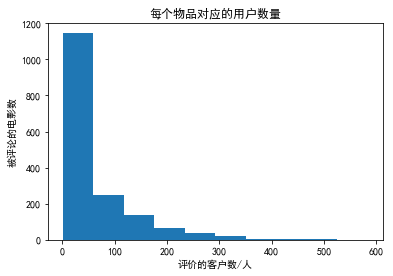

In [9]:
#画图
import matplotlib.pyplot as plt
plt.rcParams["font.sans-serif"]=['SimHei']  # 用于正常显示中文标签
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号


plt.title('每个物品对应的用户数量')
plt.xlabel("评价的客户数/人")
plt.ylabel("被评论的电影数")
plt.hist(item_id_usercnt.values)

In [10]:
#每个物品对应的用户数，（10分位，20分位，30分位。。。。100分位）
np.arange(0,1.1,step=0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [11]:
item_id_usercnt.quantile(q=np.arange(0,1.1,step=0.1))

0.0      1.0
0.1      2.0
0.2      5.0
0.3      9.0
0.4     16.0
0.5     27.0
0.6     43.0
0.7     65.0
0.8    100.0
0.9    169.0
1.0    583.0
Name: user_id, dtype: float64

##### 30%电影评分的人数少于10个。对于这部分数据，对于其他评价的相似度不会精准

### 3、观察一下每个用户评价对应的电影的数量

In [12]:
#每个用户评价电影的个数
user_id_usercnt = src_data.groupby('user_id').count()["item_id"]
user_id_usercnt.values

array([272,  62,  54,  24, 175, 211, 403,  59,  22, 184, 181,  51, 636,
        98, 104, 140,  28, 277,  20,  48, 179, 128, 151,  68,  78, 107,
        25,  79,  34,  43,  36,  41,  24,  20,  25,  20,  57, 121,  22,
        35,  52, 183, 221, 151,  48,  27,  25,  66, 215,  24,  23,  56,
        28,  65,  21, 187, 106, 154, 382, 208,  21, 232,  93, 200,  80,
        38,  30,  34,  65, 131,  38, 137,  66,  39,  79,  82,  72,  21,
        55,  29,  58, 168, 155,  68, 288,  23, 211,  21,  76, 300,  98,
       388,  20, 400, 278,  56,  63,  27, 136,  59,  67, 216,  29, 111,
        23,  64,  22,  33, 234, 133,  24,  46,  51,  48,  92, 143,  86,
        71, 181,  26,  74,  61,  54,  24, 182,  45,  23, 184,  30, 353,
        30,  22,  26,  25,  55,  35,  47,  51,  24,  21, 107,  33,  20,
       206, 316,  29,  20,  65,  36,  32, 307, 106,  23,  51,  22,  37,
        51, 173, 107, 120,  58,  42,  23,  63,  30,  20,  69,  69,  37,
        22,  28,  27,  43, 177,  38,  63, 115, 273,  42,  63, 43

(array([560., 183.,  96.,  55.,  25.,  15.,   5.,   1.,   1.,   2.]),
 array([ 20. ,  91.7, 163.4, 235.1, 306.8, 378.5, 450.2, 521.9, 593.6,
        665.3, 737. ]),
 <a list of 10 Patch objects>)

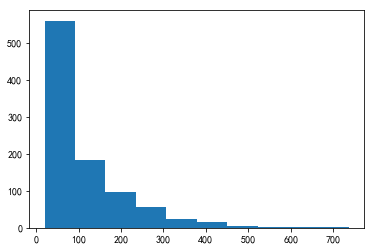

In [13]:
import matplotlib.pyplot as plt
#画图
plt.hist(user_id_usercnt.values)

In [14]:
user_id_usercnt.quantile(q=np.arange(0,1.1,step=0.1))

0.0     20.0
0.1     23.0
0.2     29.0
0.3     38.0
0.4     50.0
0.5     65.0
0.6     93.0
0.7    127.4
0.8    171.6
0.9    244.4
1.0    737.0
Name: item_id, dtype: float64

##### 效果比较好，采用用户 - 电影评分数的方法

### 观察用户-电影评分数矩阵

In [15]:
n_users = src_data.user_id.nunique()
n_items = src_data.item_id.nunique()
print(n_users)
print(n_items)

#构建用户-电影评分矩阵

src_data_matrix = np.zeros((n_users,n_items)) 
# print(src_data_matrix)    产生一个类似的全是0元素的矩阵

#src_data.itertuples()###将DataFrame转为元组##############
for line in src_data.itertuples():
#     print(line)
    src_data_matrix[line[1]-1,line[2]-1] = line[3]   #将电影和评分数给line【3】
#     print(line[3])
src_data_matrix

943
1682


array([[5., 3., 4., ..., 0., 0., 0.],
       [4., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [5., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 5., 0., ..., 0., 0., 0.]])

In [16]:
src_data.itertuples

<bound method DataFrame.itertuples of        user_id  item_id  rating   timesamp
0          196      242       3  881250949
1          186      302       3  891717742
2           22      377       1  878887116
3          244       51       2  880606923
4          166      346       1  886397596
5          298      474       4  884182806
6          115      265       2  881171488
7          253      465       5  891628467
8          305      451       3  886324817
9            6       86       3  883603013
10          62      257       2  879372434
11         286     1014       5  879781125
12         200      222       5  876042340
13         210       40       3  891035994
14         224       29       3  888104457
15         303      785       3  879485318
16         122      387       5  879270459
17         194      274       2  879539794
18         291     1042       4  874834944
19         234     1184       2  892079237
20         119      392       4  886176814
21         167  

In [17]:
#矩阵的稀疏性
sparsity = round(len(src_data_matrix.nonzero()[1])/float(n_users*n_items),3)

In [18]:
sparsity #非常稀疏

0.063

# 一、基于item的协同过滤推荐

In [19]:
#使用sklearn.metrics.pairwise中的cosine
from sklearn.metrics.pairwise import pairwise_distances
item_similarity_m = pairwise_distances(src_data_matrix.T,metric="cosine")
item_similarity_m.shape

(1682, 1682)

### 数据探索
##### 1 、电影相似矩阵

In [20]:
#非0值得比例
round(np.sum(item_similarity_m>0)
      /float(item_similarity_m.shape[0]
             *
             item_similarity_m.shape[1]),3)

0.999

In [21]:
#相似矩阵为对称矩阵
item_similarity_m[0:5,0:5].round(2)

array([[0.  , 0.6 , 0.67, 0.55, 0.71],
       [0.6 , 0.  , 0.73, 0.5 , 0.68],
       [0.67, 0.73, 0.  , 0.68, 0.79],
       [0.55, 0.5 , 0.68, 0.  , 0.67],
       [0.71, 0.68, 0.79, 0.67, 0.  ]])

In [22]:
#因为是对称的，分析上三角，得到分位数
item_similarity_m_triu = np.triu(item_similarity_m,k=1)
item_sim_nonzero = np.round(item_similarity_m_triu[item_similarity_m_triu.nonzero()],3)
np.percentile(item_sim_nonzero,np.arange(0,101,10))

#相似度得分比较大，相似度没有区分性

array([0.   , 0.776, 0.847, 0.889, 0.92 , 0.945, 0.97 , 1.   , 1.   ,
       1.   , 1.   ])

In [23]:
#知识点：上三角np.triu
arr = np.linspace(1,9,9).reshape(3,3)
np.triu(arr,k=1)

array([[0., 2., 3.],
       [0., 0., 6.],
       [0., 0., 0.]])

## 预测


评价指标选用均方根误差 (RMSE)

<script type="text/javascript" src="http://cdn.mathjax.org/mathjax/latest/MathJax.js?config=default"></script>
\\(RMSE={\sqrt{\frac{1}{n}\sum{x-\hat{x}}}}\\)

由于你只是想要考虑测试数据集中的预测评分，因此，使用item_prediction[user_item_matrix.nonzero()]筛选出预测矩阵中的所有其他元素。

In [24]:
# 得到预测矩阵P
user_item_prediction = src_data_matrix.dot(item_similarity_m)/ np.array([np.abs(item_similarity_m).sum(axis=1)])

user_item_prediction

array([[0.44627765, 0.475473  , 0.50593755, ..., 0.58815455, 0.5731069 ,
        0.56669645],
       [0.10854432, 0.13295661, 0.12558851, ..., 0.13445801, 0.13657587,
        0.13711081],
       [0.08568497, 0.09169006, 0.08764343, ..., 0.08465892, 0.08976784,
        0.09084451],
       ...,
       [0.03230047, 0.0450241 , 0.04292449, ..., 0.05302764, 0.0519099 ,
        0.05228033],
       [0.15777917, 0.17409459, 0.18900003, ..., 0.19979296, 0.19739388,
        0.20003117],
       [0.24767207, 0.24489212, 0.28263031, ..., 0.34410424, 0.33051406,
        0.33102478]])

In [25]:
# 只取预测数据集中有评分的数据集，进行评估
from sklearn.metrics import mean_squared_error
from math import sqrt
prediction_flatten = user_item_prediction[src_data_matrix.nonzero()] 
user_item_matrix_flatten = src_data_matrix[src_data_matrix.nonzero()]
sqrt(mean_squared_error(prediction_flatten, user_item_matrix_flatten))

3.392143861739501

In [26]:
# 测试数据集构建
test_data_matrix = np.zeros((n_users, n_items))
for line in src_data.itertuples():
    test_data_matrix[line[1]-1, line[2]-1] = line[3]

# 预测矩阵
item_prediction = src_data_matrix.dot(item_similarity_m) / np.array([np.abs(item_similarity_m).sum(axis=1)])     

# 只取预测数据集中有评分的数据集
from sklearn.metrics import mean_squared_error
from math import sqrt
prediction_flatten = item_prediction[test_data_matrix.nonzero()] 
test_data_matrix_flatten = test_data_matrix[test_data_matrix.nonzero()]
sqrt(mean_squared_error(prediction_flatten, test_data_matrix_flatten))

3.392143861739501

# 单模型结果提升

### 1、改变相似度算法

In [27]:
# 相似度算法指定为欧氏距离
item_similarity_m = pairwise_distances(src_data_matrix.T, metric='euclidean')
item_similarity_m

array([[ 0.        , 77.72387021, 80.07496488, ..., 84.79976415,
        84.68766144, 84.68766144],
       [77.72387021,  0.        , 42.17819342, ..., 38.36665219,
        38.19685851, 38.19685851],
       [80.07496488, 42.17819342,  0.        , ..., 31.0322413 ,
        31.11269837, 30.82207001],
       ...,
       [84.79976415, 38.36665219, 31.0322413 , ...,  0.        ,
         3.60555128,  3.60555128],
       [84.68766144, 38.19685851, 31.11269837, ...,  3.60555128,
         0.        ,  4.24264069],
       [84.68766144, 38.19685851, 30.82207001, ...,  3.60555128,
         4.24264069,  0.        ]])

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
train_data, test_data = train_test_split(src_data, test_size=0.2)

# 二、基于users的协同过滤推荐

In [30]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import pandas as pd
header = ['user_id', 'item_id', 'rating', 'timestamp']
src_data = pd.read_csv('ml-100k/u.data', sep='\t', names=header)
src_data.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [31]:
# 用户、物品数统计
n_users = src_data.user_id.nunique()
n_items = src_data.item_id.nunique() 
# 训练集、测试集分离

from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(src_data, test_size=0.3)



# 训练集 用户-物品矩阵
train_data_matrix = np.zeros((n_users, n_items))
for line in train_data.itertuples():
    train_data_matrix[line[1]-1, line[2]-1] = line[3] 


### 1、用户相似度矩阵

In [32]:
#采用余弦距离

In [33]:
from sklearn.metrics.pairwise import pairwise_distances
user_similarity_m = pairwise_distances(train_data_matrix,metric="cosine")

### 2、数据探索

#### 2.1、用户相似矩阵

In [34]:
#物品相似矩阵，行列
user_similarity_m.shape

(943, 943)

In [35]:
#非0 比例
#round四舍五入

round(np.sum(user_similarity_m>0)/float(user_similarity_m.shape[0]
                                        *user_similarity_m.shape[1]),3)

0.999

In [36]:
# 相似矩阵为对称矩阵
user_similarity_m[0:5, 0:5].round(2)

array([[0.  , 0.91, 0.97, 0.95, 0.78],
       [0.91, 0.  , 0.93, 0.86, 0.97],
       [0.97, 0.93, 0.  , 0.74, 1.  ],
       [0.95, 0.86, 0.74, 0.  , 0.99],
       [0.78, 0.97, 1.  , 0.99, 0.  ]])

In [37]:
#现在我们分析上三角，得到等分位数
user_similarity_m_triu = np.triu(user_similarity_m,k=1)
item_sim_nonzero2 = np.round(user_similarity_m_triu[
            user_similarity_m_triu.nonzero()
            ],3)
np.percentile(item_sim_nonzero2,np.arange(0,101,10))

array([0.375, 0.752, 0.805, 0.841, 0.87 , 0.895, 0.918, 0.94 , 0.961,
       0.989, 1.   ])

##### 可以看出相似度得分都偏大，相似度没有区分性

In [38]:
# 得到预测矩阵P
mean_user_rating = train_data_matrix.mean(axis=1)
ratings_diff = (train_data_matrix - mean_user_rating[:, np.newaxis])   #升维度
user_prediction = mean_user_rating[:, np.newaxis] + \
    user_similarity_m.dot(ratings_diff) / \
    np.array([np.abs(user_similarity_m).sum(axis=1)]).T

### 3、训练集预测

In [39]:
from sklearn.metrics import mean_squared_error
from math import sqrt
prediction_flatten = user_prediction[train_data_matrix.nonzero()] 
train_data_matrix_flatten = train_data_matrix[train_data_matrix.nonzero()]
sqrt(mean_squared_error(prediction_flatten, train_data_matrix_flatten))

3.1659604800553183

### 4、测试集预测

In [40]:
# 测试数据集构建
test_data_matrix = np.zeros((n_users, n_items))
for line in test_data.itertuples():
    test_data_matrix[line[1]-1, line[2]-1] = line[3]

In [41]:
# 只取预测数据集中有评分的数据集
from sklearn.metrics import mean_squared_error
from math import sqrt
prediction_flatten = user_prediction[test_data_matrix.nonzero()] 
test_data_matrix_flatten = test_data_matrix[test_data_matrix.nonzero()]
sqrt(mean_squared_error(prediction_flatten, test_data_matrix_flatten))

3.1588029425053166

### 5、提升

In [42]:
#  相似度算法指定为欧氏距离
user_similarity_m = pairwise_distances(train_data_matrix, metric='euclidean')

In [43]:
train_data, test_data = train_test_split(src_data, test_size=0.2)

# 三、基于svd的协同过滤


SVD即奇异值分解，是一种矩阵分解(Matrix Factorization)方法，这里我们将这种方法用于基于模型的协同过滤的推荐算法。

MF的目标是从已知的评分中学习用户的潜在喜好和产品的潜在属性（学习描述评分特征的特征），随后通过用户和产品的潜在特征的点积预测未知的评分。

大体过程为：将矩阵分成成三个矩阵的乘积：
A = U*S*V^T







In [44]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import pandas as pd
header = ['user_id', 'item_id', 'rating', 'timestamp']
src_data = pd.read_csv('ml-100k/u.data', sep='\t', names=header)
src_data.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [45]:
                      # 用户、物品数统计
n_users = src_data.user_id.nunique()
n_items = src_data.item_id.nunique() 
# 训练集、测试集分离
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(src_data, test_size=0.3)
# 训练集 用户-物品矩阵
train_data_matrix = np.zeros((n_users, n_items))
for line in train_data.itertuples():
    train_data_matrix[line[1]-1, line[2]-1] = line[3] 
# 测试集 用户-物品矩阵    
test_data_matrix = np.zeros((n_users, n_items))
for line in test_data.itertuples():
    test_data_matrix[line[1]-1, line[2]-1] = line[3]

## SVD

In [47]:
import scipy.sparse as sp
from scipy.sparse.linalg import svds

#get SVD components from train matrix. Choose k.
u, s, vt = svds(train_data_matrix, k = 20)
s_diag_matrix=np.diag(s)
svd_prediction = np.dot(np.dot(u, s_diag_matrix), vt)
u.shape
s.shape
vt.shape
s_diag_matrix.shape
svd_prediction.shape

(943, 20)

(20,)

(20, 1682)

(20, 20)

(943, 1682)

In [48]:
# 查看预测矩阵值分布
pd.Series(np.percentile(svd_prediction, np.arange(0, 101, 10))).map("{:.2f}".format)
# 查看训练数据矩阵值分布
pd.Series(np.percentile( train_data_matrix, np.arange(0, 101, 10))).map("{:.2f}".format)
# 查看训练数据矩阵非0值分布
pd.Series(np.percentile( train_data_matrix[train_data_matrix.nonzero()], np.arange(0, 101, 10))).map("{:.2f}".format)

0     -3.28
1     -0.07
2     -0.02
3     -0.00
4      0.00
5      0.02
6      0.04
7      0.09
8      0.20
9      0.52
10    10.03
dtype: object

0     0.00
1     0.00
2     0.00
3     0.00
4     0.00
5     0.00
6     0.00
7     0.00
8     0.00
9     0.00
10    5.00
dtype: object

0     1.00
1     2.00
2     3.00
3     3.00
4     3.00
5     4.00
6     4.00
7     4.00
8     5.00
9     5.00
10    5.00
dtype: object

In [49]:
## 预测值限定最小值和最大值
# 将预测值中小于0的值，赋值为0
svd_prediction[svd_prediction<0] = 0
# 将预测值中大于5的值，赋值为5
svd_prediction[svd_prediction>5] = 5

### 评估

### 1、 RMSE评估

评价指标选用均方根误差 (RMSE)

<script type="text/javascript" src="http://cdn.mathjax.org/mathjax/latest/MathJax.js?config=default"></script>
\\(RMSE={\sqrt{\frac{1}{n}\sum{x-\hat{x}}}}\\)

由于你只是想要考虑测试数据集中的预测评分，因此，使用item_prediction[user_item_matrix.nonzero()]筛选出预测矩阵中的所有其他元素。

In [51]:
# 只取预测数据集中有评分的数据集，进行评估
from sklearn.metrics import mean_squared_error
from math import sqrt
prediction_flatten = svd_prediction[train_data_matrix.nonzero()] 
train_data_matrix_flatten = train_data_matrix[train_data_matrix.nonzero()]
sqrt(mean_squared_error(prediction_flatten, train_data_matrix_flatten))

2.44241461042488

In [52]:
# 只取预测数据集中有评分的数据集
from sklearn.metrics import mean_squared_error
from math import sqrt
prediction_flatten = svd_prediction[test_data_matrix.nonzero()] 
test_data_matrix_flatten = test_data_matrix[test_data_matrix.nonzero()]
sqrt(mean_squared_error(prediction_flatten, test_data_matrix_flatten))

2.776921310745136